In [1]:
import xymass
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [10]:
#set parameters for the various IMFs.  

m_min=0.03 #minimum mass, solar masses
m_max=150 #maximum mass, solar masses

#Salpeter
salpeter_alpha=2.3#power-law index

#Kroupa
kroupa_alpha1=0.3 #power-law index, first piece
kroupa_alpha2=1.3 #power-law index, second piece
kroupa_alpha3=2.3 #power-law index, third piece
kroupa_m1_break=0.08 #break mass between first and second pieces                                                                                                                    
kroupa_m2_break=0.5 # break mass between second and third pieces

#broken power law
bpl_alpha1=1.4 #power-law index, first piece
bpl_alpha2=2.5 #power-law index, second piece
bpl_m_break=0.1 #break mass between first and second pieces                                                                                                                         

#log-normal
lognormal_mean=0.08 #mean log10(mass/Msun)
lognormal_std=0.7 #standard deviation of log10(mass/Msun)

In [11]:
#draw masses from specified IMF model

nsample=10000 #number of masses to draw

kroupa=xymass.sample_imf(nsample,'kroupa',alpha1=kroupa_alpha1,alpha2=kroupa_alpha2,alpha3=kroupa_alpha3,m1_break=kroupa_m1_break,m2_break=kroupa_m2_break)
bpl=xymass.sample_imf(nsample,'bpl',alpha1=bpl_alpha1,alpha2=bpl_alpha2,m_break=bpl_m_break)
salpeter=xymass.sample_imf(nsample,'salpeter',alpha=salpeter_alpha)
lognormal=xymass.sample_imf(nsample,'lognormal')

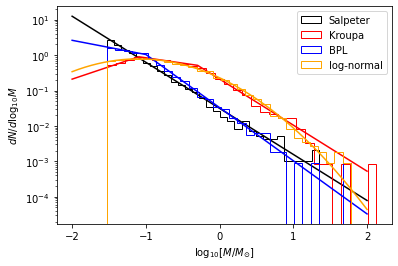

In [12]:
# plot histograms of sampled masses

log_mass=np.linspace(-2,2,1000)
mass=10**log_mass

plt.hist(np.log10(salpeter.mass),density=True,bins=30,histtype='step',color='k',label='Salpeter')
plt.plot(log_mass,salpeter.func(mass)*(mass*np.log(10)),color='k')

plt.hist(np.log10(kroupa.mass),density=True,bins=30,histtype='step',color='r',label='Kroupa')
plt.plot(log_mass,kroupa.func(mass)*(mass*np.log(10)),color='r')

plt.hist(np.log10(bpl.mass),density=True,bins=30,histtype='step',color='b',label='BPL')
plt.plot(log_mass,bpl.func(mass)*(mass*np.log(10)),color='b')

plt.hist(np.log10(lognormal.mass),density=True,bins=30,histtype='step',color='orange',label='log-normal')
plt.plot(log_mass,lognormal.func(mass)*(mass*np.log(10)),color='orange')

plt.xscale('linear')
plt.yscale('log')
plt.xlabel(r'$\log_{10}[M/M_{\odot}]$')
plt.ylabel(r'$dN / d\log_{10}M$')
plt.legend(loc=1)
plt.show()
